# FAIRe Qualitäts-KPIs

Name: Maximilian Groß 
Datum: 19.10.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfrage zu der Lerneinheit:

Wie gut lässt sich die Komplexität eines Fahrzeugs anhand der Bauteilkosten abschätzen?

## Erstes Fahrzeug


### Hypothese
Formulieren Sie eine Hypothese zu diesem ersten Versuch:

Die Bauteilkosten eines Fahrzeugs steigen mit der Komplexität bemessen an der Zahl an verschiedenen Teilen.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die gegebenen LEGO-Teile zu verwenden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](Pfad_zum_Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


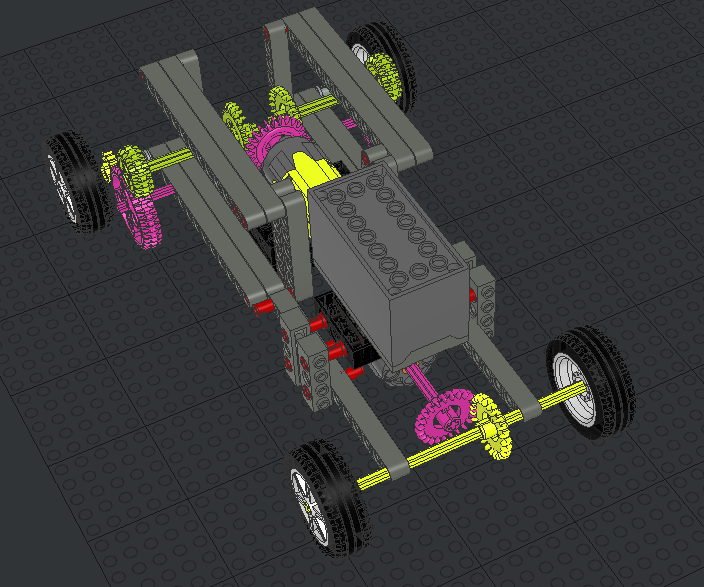

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Das Fahrzeug ist sowohl an Vorder- als auch Hinterachse angetrieben. Die Vorderachse ist als ein Teil ausgeführt und wird zentral angetrieben. Die Hinterachse ist zweigeteilt und wird dezentral angetrieben. Um gleiche Drehrichtung und Drehzahl der Hinterräder zu gewährleisten ist hinten links eine Getriebestufe mehr verbaut als hinten rechts.

In [1]:
# initialize componentens

# Import libraries and modules
import json

from functions.classes import LegoComponent
from functions.classes import LegoAssembly
from functions.classes import AggregationLayer
from functions.classes import KPIEncoder
from functions.classes import print_assembly_tree

# Initalize components list and jsons list
parts_list = []
jsons = ["datasheets/axles.json","datasheets/batteries.json","datasheets/frame.json","datasheets/wheels.json"
         ,"datasheets/gears.json","datasheets/motors.json","datasheets/wheels.json"]

# Append parts_list by json files
for i in range(len(jsons)):
    with open(jsons[i]) as json_file:
        parts_list.append(json.load(json_file))


# Create front axel and wheels components
front_axle = LegoComponent("front axle", parts_list[0]["50451"])
front_wheel_r = LegoComponent("front wheel", parts_list[6]["56904c02"])
front_wheel_l = front_wheel_r.clone("front wheel")

# Create front drivetrain components
gear_24_crown_front_axle = LegoComponent("gear front axle", parts_list[4]["3650"])
gear_24_crown_front_motor = gear_24_crown_front_axle.clone("gear front motor")

front_motor_shaft = LegoComponent("front motor shaft", parts_list[0]["32073"])
front_motor = LegoComponent("motor", parts_list[5]["8883-1"])

 # Create frame components

beam_7_1 = LegoComponent("beam 7 studs", parts_list[2]["32524"])
beam_7_list = [beam_7_1]
for i in range(1,6):
    beam_7_list.append(beam_7_1.clone("beam 7 studs"))


beam_13_1 = LegoComponent("beam 13 studs", parts_list[2]["41239"])
beam_13_list = [beam_13_1]
for i in range(1,10):
    beam_13_list.append(beam_13_1.clone("beam 13 studs"))

brick_4_1 = LegoComponent("brick 4 studs", parts_list[2]["3701"])
brick_4_list = [brick_4_1]
for i in range(1,4):
    brick_4_list.append(brick_4_1.clone("brick 4 studs"))


pin_long_1 = LegoComponent("pin long", parts_list[2]["32556"])
pin_list = [pin_long_1]
for i in range(1,22):
    pin_list.append(pin_long_1.clone("pin long"))


brick_4x6_1 = LegoComponent("brick 4x6", parts_list[2]["32531"])
brick_4x6_2 = brick_4x6_1.clone("brick 4x6")
brick_4x6_3 = brick_4x6_1.clone("brick 4x6")

# Create battery component
battery = LegoComponent("battery", parts_list[1]["88000-1"])

# Create rear drivetrain components
rear_motor = front_motor.clone("rear motor")
rear_motor_shaft = front_motor_shaft.clone("rear motor shaft")
gear_24_crown_rear_motor = gear_24_crown_front_axle.clone("gear rear motor")

gear_24_crown_rear_stage1_r = gear_24_crown_front_axle.clone("24 tooth crowned gear rear stage 1 shaft right")
gear_24_crown_rear_stage1_l = gear_24_crown_front_axle.clone("24 tooth crowned gear rear stage 1 shaft left")
rear_stage1_shaft_r = LegoComponent("rear stage 1 shaft right",parts_list[0]["44294"])
rear_stage1_shaft_l = rear_stage1_shaft_r.clone("rear stage 1 shaft left")

gear_20_rear_r = LegoComponent("20 tooth gear rear right", parts_list[4]["32269"])
gear_20_rear_l = gear_20_rear_r.clone("20 tooth gear rear right")


rear_stage2_shaft = front_axle.clone("rear stage2 shaft")
gear_36_rear_r = LegoComponent("36 tooth gear rear right", parts_list[4]["32498"])
gear_36_rear_l = gear_36_rear_r.clone("36 tooth gear rear left")

gear_16_rear_r = LegoComponent("gear rear axle", parts_list[4]["94925"])
gear_16_rear_l = gear_16_rear_r.clone("gear rear axle")

bushing_r = LegoComponent("stop bushing right", parts_list[2]["32054"])
bushing_l = bushing_r.clone("stop bushing left")

# Create rear axel and wheel components
rear_axle_r = LegoComponent("rear axle right",parts_list[0]["32073"])
rear_axle_l = rear_axle_r.clone("rear axle left")

rear_wheel_r = front_wheel_r.clone("rear wheel right")
rear_wheel_l = front_wheel_r.clone("rear wheel left")

            

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Insanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [2]:
# set properties
front_axle.properties["color"] = "yellow"
gear_24_crown_front_axle.properties["color"] = "yellow"

gear_24_crown_front_motor.properties["color"] = "pink"
front_motor_shaft.properties["color"] = "pink"

for i in range(len(pin_list)):
    pin_list[i].properties["color"] = "red"

In [3]:
# aggregate components

# Front axle assembly
front_axle_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"front axle assembly", assembly_method = "slide onto axle")
front_axle_assembly.add([front_wheel_r,front_wheel_l,front_axle,gear_24_crown_front_axle])

# Front motor shaft assembly
front_motor_shaft_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"front motor shaft assembly"
                                          , assembly_method = "slide onto axle")
front_motor_shaft_assembly.add([gear_24_crown_front_motor,front_motor_shaft,front_motor])

# Front frame half assembly
front_frame_half_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"front frame half assembly"
                                         , assembly_method = "stick together using pins")

front_frame_half_assembly.add([beam_13_list[0],beam_13_list[1],brick_4_list[0],brick_4_list[1],brick_4_list[2],brick_4_list[3]
                               ,brick_4x6_1,beam_7_list[0],beam_7_list[1],pin_list[0],pin_list[1],pin_list[2],pin_list[3]
                               ,pin_list[4],pin_list[5],pin_list[6],pin_list[7],pin_list[8],pin_list[9],pin_list[10]
                               ,pin_list[11],battery])

# Rear frame half assembly
rear_frame_half_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"rear frame half assembly"
                                         , assembly_method = "stick together using pins")

rear_frame_half_assembly.add([beam_13_list[2],beam_13_list[3],beam_13_list[4],beam_13_list[5],beam_13_list[6],beam_13_list[7]
                              ,beam_13_list[8],beam_13_list[9],beam_7_list[2],beam_7_list[3],beam_7_list[4],beam_7_list[5]
                              ,brick_4x6_2,brick_4x6_3,pin_list[12],pin_list[13],pin_list[14],pin_list[15],pin_list[16]
                              ,pin_list[17],pin_list[18],pin_list[19],pin_list[20],pin_list[21]])

# Rear motor shaft assembly
rear_motor_shaft_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"rear motor shaft assembly"
                                          , assembly_method = "slide onto axle")
rear_motor_shaft_assembly.add([gear_24_crown_rear_motor,rear_motor_shaft,rear_motor])

# Rear stage 1 right assembly 
rear_stage1_r_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"rear stage 1 right assembly"
                                          , assembly_method = "slide onto axle")

rear_stage1_r_assembly.add([rear_stage1_shaft_r,gear_24_crown_rear_stage1_r,gear_20_rear_r])

# Rear stage 1 left assembly 
rear_stage1_l_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"rear stage 1 left assembly"
                                          , assembly_method = "slide onto axle")

rear_stage1_l_assembly.add([rear_stage1_shaft_l,gear_24_crown_rear_stage1_l,gear_20_rear_l])

# Rear stage 2 assembly
rear_stage2_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"rear stage 2 assembly"
                                          , assembly_method = "slide onto axle")

rear_stage2_assembly.add([rear_stage2_shaft,gear_36_rear_r,gear_36_rear_l])

# Rear axle right assembly
rear_axle_r_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"rear axle right assembly"
                                          , assembly_method = "slide onto axle")

rear_axle_r_assembly.add([rear_axle_r,rear_wheel_r,bushing_r,gear_16_rear_r])

# Rear axle left assembly
rear_axle_l_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"rear axle left assembly"
                                          , assembly_method = "slide onto axle")

rear_axle_l_assembly.add([rear_axle_l,rear_wheel_l,bushing_l,gear_16_rear_l])

# Front drivetrain assembly
front_drivetrain_assembly = LegoAssembly( AggregationLayer.ASSEMBLY, "front drivetrain assembly"
                                          ,assembly_method = "align gears")

front_drivetrain_assembly.add([front_axle_assembly,front_motor_shaft_assembly])

# Frame assembly
frame_assembly = LegoAssembly( AggregationLayer.ASSEMBLY, "frame assembly" ,assembly_method = "stick together using pins")

frame_assembly.add([front_frame_half_assembly, rear_frame_half_assembly])

# Rear drivetrain assembly
rear_drivetrain_asssembly = LegoAssembly(AggregationLayer.ASSEMBLY, "rear drivetrain assembly"
                                         ,assembly_method = "align gears")

rear_drivetrain_asssembly.add([rear_motor_shaft_assembly,rear_stage1_r_assembly,rear_stage1_l_assembly
                               ,rear_stage2_assembly,rear_axle_r_assembly,rear_axle_l_assembly])

# Assemble car from assemblies

car = LegoAssembly(AggregationLayer.SYSTEM,"car1")
car.add([front_drivetrain_assembly,frame_assembly,rear_drivetrain_asssembly])


### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

Dimension Aufwand: Kosten aller Teile
$$ Gesamtkosten = \sum \limits_{n=1}^{\#Teile} Kosten(Teile[n]) $$


Dimension Verfügbarkeit: Maximale Lieferzeit
$$Lieferzeit = max\left\{Teile[Lieferzeit]\right\}$$


Dimension Akzeptanz: Anzahl aller Teile
$$ Teilezahl = #Teile $$

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [4]:
# calculate the KPIs for your car
from functions import calculation_rules
# test the import
#calculation_rules.test_function()

# Dimension Aufwand:
total_cost = calculation_rules.calculate_total_cost(car)                                     
# Add cost KPI to system
car.properties["price [Euro]"] = total_cost

# Dimension Verfügbarkeit:
delivery_time = calculation_rules.calculate_delivery_time(car)
# Add delivery time KPI to system
car.properties["delivery time [days]"] = delivery_time

# Dimension Akzeptanz
number_of_parts = calculation_rules.calculate_number_of_parts(car)
#Add number of parts to system
car.properties["Number of parts"] = number_of_parts


In [5]:
# print your KPIs

print("Total cost:", round(total_cost,2) , "€")

print("Delivery time:", delivery_time, "days")

print("Number of parts:", number_of_parts)

Total cost: 78.41 €
Delivery time: 13 days
Number of parts: 73


Exportieren Sie schließlich ihr entworfenes Fahrzeug inklusive der entwickelten KPI:

In [6]:
# export car and its properties
with open("car1.json","w") as fp:
    json.dump(car.to_dict(), fp, cls=KPIEncoder)

## Zweites Fahrzeug

### Hypothese

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie eine Hypothese zu diesem Versuch:

Es ist möglich ein Fahrzeug mit vergleichbarem Funktionsumfang günstiger, und damit in der Dimension Aufwand verbessert, als auch aus weniger Teilen, und damit in der Dimension Akzeptanz verbessert, zu bauen.

Beschreiben Sie, welche Verbesserung Sie vornehmen:

Statt seperaten Motoren für Vorder- und Hinterachse, wird ein Motor beide Achsen antreiben. Außerdem werden die Getriebestufen, besonders an der Hinterachse stark vereinfacht. Zusätzlich kann die Zahl an Rahmenteilen gesenkt werden, da das Fahrzeug leichter wird.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

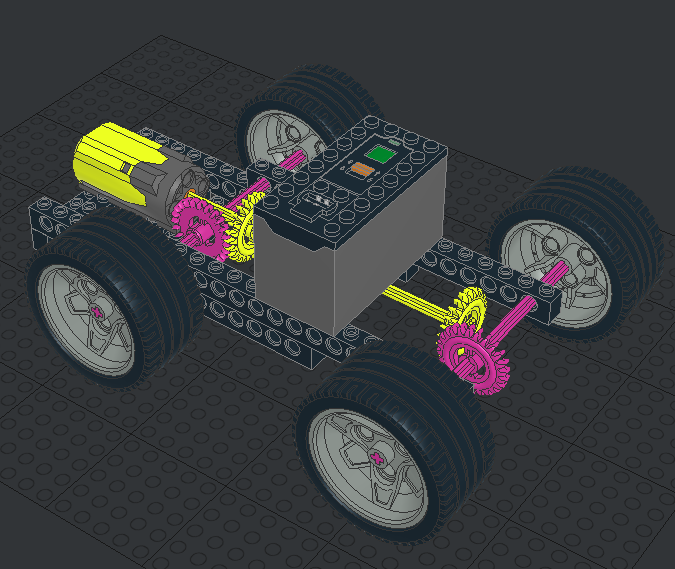

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Das zweite Fahrzeug ist ebenfalls front- und heckangetrieben. Im Vergleich zum ersten Fahrzeug kommt hierbei jedoch nur ein Motor zum Einsatz der beide Achsen antreibt.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [7]:
# initialize componentens

# Create front axel and wheels components
front_axle = LegoComponent("front axle", parts_list[0]["50451"])
front_wheel_r = LegoComponent("front wheel right", parts_list[6]["41896c04"])
front_wheel_l = front_wheel_r.clone("front wheel left")
gear_24_crown_front_axle = LegoComponent("24 tooth crowned gear front axle", parts_list[4]["3650"])

# Create rear axel and wheels components
rear_axle = front_axle.clone("rear axle")
rear_wheel_r = front_wheel_r.clone("rear wheel right")
rear_wheel_l = front_wheel_r.clone("rear wheel left")
gear_24_crown_rear_axle = gear_24_crown_front_axle.clone("24 tooth crowned gear rear axle")

# Create motor shaft components
motor = LegoComponent("motor", parts_list[5]["8883-1"])
motor_shaft = front_axle.clone("motor shaft")
gear_24_crown_rear_motor = gear_24_crown_front_axle.clone("24 tooth crowned gear rear motor")
gear_24_crown_front_motor = gear_24_crown_front_axle.clone("24 tooth crowned gear front motor")

# Create frame components
brick_1x16_1 = LegoComponent("brick_1x16_1", parts_list[2]["3703"])
brick_1x16_2 = brick_1x16_1.clone("brick_1x16_2")
brick_1x16_3 = brick_1x16_1.clone("brick_1x16_3")
brick_1x16_4 = brick_1x16_1.clone("brick_1x16_4")

brick_1x8_1 = LegoComponent("brick_1x8_1", parts_list[2]["3702"])
brick_1x8_2 = brick_1x8_1.clone("brick_1x8_2")

brick_4x6 = LegoComponent("brick_4x6", parts_list[2]["32531"])

# Create battery component
battery = LegoComponent("battery", parts_list[1]["88000-1"])


In [8]:
# set properties
front_axle.properties["color"] = "pink"
gear_24_crown_front_axle.properties["color"] = "pink"

rear_axle.properties["color"] = "pink"
gear_24_crown_rear_axle.properties["color"] = "pink"

motor_shaft.properties["color"] = "yellow"
gear_24_crown_rear_motor.properties["color"] = "yellow"
gear_24_crown_front_motor.properties["color"] = "yellow"

In [9]:
# aggregate components

# Front axle assembly
front_axle_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"front axle assembly", assembly_method = "slide onto axle")
front_axle_assembly.add([front_wheel_r,front_wheel_l,front_axle,gear_24_crown_front_axle])

# Rear axle assembly
rear_axle_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"rear axle assembly", assembly_method = "slide onto axle")
rear_axle_assembly.add([rear_axle,rear_wheel_r,rear_wheel_l,gear_24_crown_rear_axle])

# Motor shaft assembly
motor_shaft_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY,"motor shaft assembly" , assembly_method = "slide onto axle")
motor_shaft_assembly.add([motor,motor_shaft,gear_24_crown_rear_motor,gear_24_crown_front_motor])

# Drivetrain assembly
drivetrain_assembly = LegoAssembly( AggregationLayer.ASSEMBLY, "drivetrain assembly" ,assembly_method = "align gears")
drivetrain_assembly.add([front_axle_assembly,rear_axle_assembly,motor_shaft_assembly])

# Frame assembly
frame_assembly = LegoAssembly( AggregationLayer.ASSEMBLY, "frame assembly" ,assembly_method = "stick together like lego blocks")
frame_assembly.add([brick_1x16_1, brick_1x16_2, brick_1x16_3, brick_1x16_4, brick_1x8_1, brick_1x8_2, brick_4x6, battery])

# Assemble car from assemblies
car = LegoAssembly(AggregationLayer.SYSTEM,"car2")
car.add([drivetrain_assembly,frame_assembly])


### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeuges

In [10]:
# calculate the KPIs for your car

# Dimension Aufwand:
total_cost = calculation_rules.calculate_total_cost(car)                                     
# Add cost KPI to system
car.properties["price [Euro]"] = total_cost

# Dimension Verfügbarkeit:
delivery_time = calculation_rules.calculate_delivery_time(car)
# Add delivery time KPI to system
car.properties["delivery time [days]"] = delivery_time

# Dimension Akzeptanz
number_of_parts = calculation_rules.calculate_number_of_parts(car)
#Add number of parts to system
car.properties["Number of parts"] = number_of_parts

In [11]:
# print your KPIs
print("Total cost:", round(total_cost,2) , "€")

print("Delivery time:", delivery_time, "days")

print("Number of parts:", number_of_parts)

Total cost: 54.81 €
Delivery time: 13 days
Number of parts: 20


Exportieren Sie ihr Fahrzeug inklusive der KPIs:

In [12]:
# export car and its properties
with open("car2.json","w") as fp:
    json.dump(car.to_dict(), fp, cls=KPIEncoder)

## Bewertung
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

<BarContainer object of 2 artists>

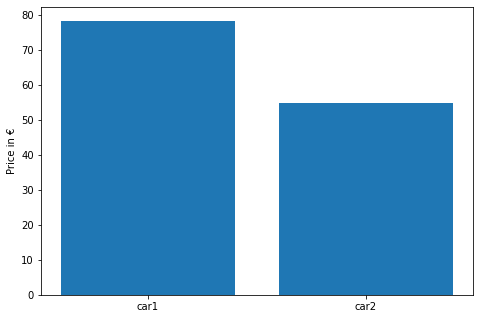

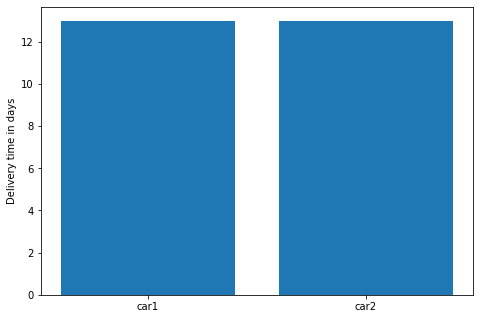

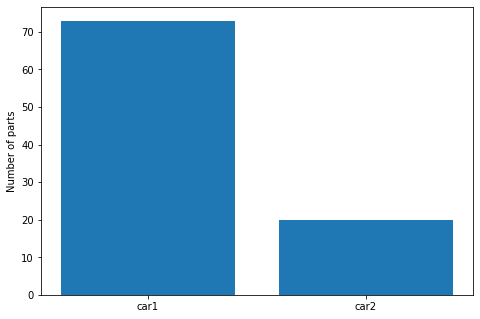

In [13]:
# plot the data, save diagramm as svg-file

# Open json files
with open("car.json") as json_file:
    car1 = json.load(json_file)
    
with open("car2.json") as json_file:
    car2 = json.load(json_file)
    
# Import plotting library
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Create first figure and axes
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.set_ylabel('Price in €')

categories1 = [car1["assembly"]["properties"]["label"],car2["assembly"]["properties"]["label"]]

ax1.bar(categories1, [car1["assembly"]["properties"]["price [Euro]"],
                    car2["assembly"]["properties"]["price [Euro]"]])

# Create first figure and axes
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.set_ylabel('Delivery time in days')

categories2 = [car1["assembly"]["properties"]["label"],car2["assembly"]["properties"]["label"]]

ax2.bar(categories2, [car1["assembly"]["properties"]["delivery time [days]"],
                    car2["assembly"]["properties"]["delivery time [days]"]])

# Create first figure and axes
fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,1,1])
ax3.set_ylabel('Number of parts')

categories3 = [car1["assembly"]["properties"]["label"],car2["assembly"]["properties"]["label"]]

ax3.bar(categories3, [car1["assembly"]["properties"]["Number of parts"],
                    car2["assembly"]["properties"]["Number of parts"]])
    


Interpretieren Sie ihre Ergebnisse. Vergleichen Sie die KPIs ihrer Autos. Konnten Sie ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Die Kosten des zweiten Autos sind im Vergleich zum Ersten um 30% gesunken.
Die Lieferzeit ist gleich geblieben, da beide Autos ein identisches Teil verbaut haben, welches die längste Lieferzeit aller Teile hat.
Die Anzahl an Teilen wurde um etwa 70% gesenkt, da das zweite Auto weniger Getriebe- und Rahmenteile verwendet.

Dadurch dass das zweite Auto erheblich weniger Teile besitzt ist sein Zusammenbau und eventuelle Wartungen stark einfacht. Dies erhöht die Qualität des Autos, da es insgesamt zu weniger Standzeit führt und das Auto mehr eingesetzt werden kann. Außerdem ist der Zusammenbau erheblich vereinfacht wodurch das Auto auch für eine größere Zielgruppe geeignet ist. 

Diskutieren Sie, inwieweit Ihre entickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Die Daten aus denen die KPI's erhoben sind finden sich vollständig in den gedumpten json Dateien der Autos wodurch sie die leicht nachzuschauen und damit "findable" sind.
Ebenso sind die Daten "accessible", da sich die einzelnen Teile mit einzigartigem Indikator in den json Dateien befinden.
Das Vokabular mit denen die Metadaten benannt sind ist leicht verständlcich und damit für jeden zu verstehen. Außerdem werden sie alle in einem standard Dateiformat gesammelt.
Die KPI's sind außerdem "reusable, da sie genauso auf andere ähnlich angelegte Datensätze anwendbar sind.


Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Da die datasheets nicht besonders viele/interessante Daten ausweisen, lassen sich auch nur wenig wirklich interessante KPIs daraus bilden. Wären beispielsweise die Kapazitäten der Akkus sowie der Stromverbrauch der Motoren mit angegeben, ließen sich die Autos detailierter bewerten. Da beim Zusammenbau der Autos mit dem Framework nicht die tatsächliche Position der Teile und ihre Orientierung im Raum miteinfließt, sondern sie nur in Assemblies gesammelt werden, können auch die Dimensionen des Fahrzeugs nicht bestimmt werden. Das würde ebenfalls interessante Berechnungsmethoden für KPIs ermöglichen.

Gelernt habe ich den besseren Umgang mit Daten im json Format.